#**라이브러리**

In [185]:
# 기본 (?)
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go
# import networkx as nx
# import plotly.io as pio
# pio.renderers.default = "notebook_connected"
# import datetime

In [1]:
# 코랩 한글 깨짐 현상 - 나눔폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,431 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and d

# **데이터 정보**

1. 21대 국회의원 당선인명단.xlsx (출처 :  중앙선거관리 위원회)

2. New_people.csv (출처 : 데이콘)
  - 1~21대 국회의원 리스트
      > 이름대수, 생일, 학력+경력, url(대한민국헌정회 대별 회원정보 페이지 url, [정당 - 15대 국회 이후 정당 비식별화(숫자로 표기)])

3. Suggest.csv (출처 : 데이콘)
  - 국회의원 발의법의안 (1대 국회 ~ 21대 국회 전체)

3-1. (추가) 21대 국회의원 발의 법의안
  - 추가 이유 : 데이콘에서 데이터를 제공한 시점에서 시간이 지났기 때문에 새로운 입법 데이터 추가 및 발의안 처리 사항에 대한 업데이트가 있기 때문. 
  - 출처 : 열려라 국회
  - data 1 : 국회의원 발의 법률안(21대, 2020.06 ~ 2020. 12)
  - data 2 : 국회의원 발의 법률안(21대, 2021.01 ~ 2021. 10. 19)
  - 기타 사항 : 한 번에 10000 행의 데이터밖에 다운받지 못하기 때문에, 나누어 다운받아 두 데이터를 합쳐줄 것.

4. Process.csv (출처 : 데이콘)
  - 법안 본회의 처리 안건

5. 크롤링 데이터
	- 법안 상세 내용 (크롤링 코드 보고 따라 하기)

6. 성별/ 연령별 인구 통계 - 거주자 기준 / 2021.09.30 기준(가장 최근)
  - 출처 : https://jumin.mois.go.kr/ageStatMonth.do#none
  - 연령대별 인구 분포
  - 성별 연령 평균

+ 추가 사항
  - 국회 출석률, 입법률

  



###**데이터 로드**

In [186]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dacon 데이터**

In [187]:
new_people = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/new_people.csv', encoding='cp949')
process = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/process.csv')
suggest = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/suggest.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**국회의원 발의법안 추가 데이터(열려라 국회)**
- 21대 국회 발의 법안 데이터 concat (suggest_1 + suggest_2 = suggest_21)

In [188]:
suggest_1 = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/국회의원발의법률안(20.6~20.12).csv', encoding='cp949')
suggest_2 = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/국회의원발의법률안 (21.1~21.1019).csv', encoding='cp949')

In [189]:
print(suggest_1.shape, suggest_2.shape)

(6463, 11) (5221, 11)


In [190]:
suggest_21 = pd.concat([suggest_1, suggest_2])
suggest_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11684 entries, 0 to 5220
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   의안번호     11684 non-null  int64 
 1   대수       11684 non-null  int64 
 2   법률안명     11684 non-null  object
 3   제안자      11684 non-null  object
 4   대표발의자    11684 non-null  object
 5   공동발의자    11684 non-null  object
 6   상세페이지    11684 non-null  object
 7   소관위원회    11658 non-null  object
 8   제안일      11684 non-null  object
 9   처리상태     2478 non-null   object
 10  제안자목록링크  11684 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [15]:
suggest_21.head()

,의안번호,대수,법률안명,제안자,대표발의자,공동발의자,상세페이지,소관위원회,제안일,처리상태,제안자목록링크
0,2107128,21,검사징계법 일부개정법률안,이수진의원등20인,이수진,"권인숙,김경만,김남국,김병기,김승원,문진석,민형배,박찬대,설훈,신동근,유정주,이규민...",http://likms.assembly.go.kr/bill/billDetail.do...,법제사법위원회,2020-12-31,NaN,http://likms.assembly.go.kr/bill/coactorListPo...
1,2107126,21,전기사업법 일부개정법률안,이규민의원등12인,이규민,"김남국,김성환,김승원,김정호,김홍걸,민형배,윤미향,이동주,이장섭,임오경,홍정민",http://likms.assembly.go.kr/bill/billDetail.do...,산업통상자원중소벤처기업위원회,2020-12-31,NaN,http://likms.assembly.go.kr/bill/coactorListPo...
2,2107125,21,국가재정법 일부개정법률안,이규민의원등11인,이규민,"김남국,김승원,박상혁,오영환,윤미향,이동주,임오경,조오섭,홍기원,홍성국",http://likms.assembly.go.kr/bill/billDetail.do...,기획재정위원회,2020-12-31,NaN,http://likms.assembly.go.kr/bill/coactorListPo...
3,2107124,21,가축분뇨의 관리 및 이용에 관한 법률 일부개정법률안,이규민의원 등 14인,이규민,"김남국,박상혁,박찬대,서삼석,송영길,윤미향,이동주,임오경,조오섭,허영,홍기원,홍성국...",http://likms.assembly.go.kr/bill/billDetail.do...,환경노동위원회,2020-12-31,NaN,http://likms.assembly.go.kr/bill/coactorListPo...
4,2107123,21,형사소송법 일부개정법률안,이수진의원등23인,이수진,"강선우,권인숙,김경만,김남국,김민석,김병기,김승원,문진석,민형배,박찬대,설훈,신동근...",http://likms.assembly.go.kr/bill/billDetail.do...,법제사법위원회,2020-12-31,NaN,http://likms.assembly.go.kr/bill/coactorListPo...


**21대 국회의원 당선인 데이터**

In [16]:
df_21 = pd.read_excel('/content/drive/MyDrive/codestates/codestates project 1/제21대_국회의원선거(재보궐선거_포함)_당선인명부.xlsx')

In [17]:
df_21.head()

,시도명,선거구명,소속정당명,성명,한자,성별,생년월일,연령,직업,학력,경력1,경력2
0,서울특별시,종로구,더불어민주당,이낙연,李洛淵,남,19521220,67,정당인,서울대학교 법과대학 법학과 졸업,(현)민주당 코로나19국난극복위원장,(전)제45대 국무총리
1,서울특별시,중구성동구을,더불어민주당,박성준,朴省俊,남,19690423,50,정당인,성균관대학교 정치외교학과 정치학 박사,(전) JTBC 아나운서,(현)더불어민주당 중앙당 부대변인
2,서울특별시,용산구,미래통합당,권영세,權寧世,남,19590224,61,변호사,하버드대학교 케네디스쿨 졸업 (행정학석사 2000.7~2001.6),(전) 주중국대한민국 대사,(전) 제16ㆍ17ㆍ18대 국회의원
3,서울특별시,중구성동구갑,더불어민주당,홍익표,洪翼杓,남,19671120,52,정치인,한양대학교 대학원 정치외교학과 졸업(정치학박사),(현)국회의원(제19대.20대),(전)더불어민주당 수석대변인
4,서울특별시,광진구갑,더불어민주당,전혜숙,全惠淑,여,19550505,64,국회의원,성균관대학교 임상약학대학원 약학석사(사회약학),(현) 제20대 광진구갑 국회의원,(현) 국회 행정안전위원회 위원장


**인구 통계 데이터 (연령별/성별)(국내거주자, 2021.09.30 기준)**

In [18]:
population = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/202109_202109_연령별인구현황_월간.csv',encoding='cp949')

In [19]:
population.head()

,행정구역,2021년09월_거주자_총인구수,2021년09월_거주자_연령구간인구수,2021년09월_거주자_20~29세,2021년09월_거주자_30~39세,2021년09월_거주자_40~49세,2021년09월_거주자_50~59세,2021년09월_거주자_60~69세,2021년09월_거주자_70~79세,2021년09월_거주자_80~89세,2021년09월_거주자_90~99세,2021년09월_거주자_100세 이상,2021년09월_남_거주자_총인구수,2021년09월_남_거주자_연령구간인구수,2021년09월_남_거주자_20~29세,2021년09월_남_거주자_30~39세,2021년09월_남_거주자_40~49세,2021년09월_남_거주자_50~59세,2021년09월_남_거주자_60~69세,2021년09월_남_거주자_70~79세,2021년09월_남_거주자_80~89세,2021년09월_남_거주자_90~99세,2021년09월_남_거주자_100세 이상,2021년09월_여_거주자_총인구수,2021년09월_여_거주자_연령구간인구수,2021년09월_여_거주자_20~29세,2021년09월_여_거주자_30~39세,2021년09월_여_거주자_40~49세,2021년09월_여_거주자_50~59세,2021년09월_여_거주자_60~69세,2021년09월_여_거주자_70~79세,2021년09월_여_거주자_80~89세,2021년09월_여_거주자_90~99세,2021년09월_여_거주자_100세 이상
0,전국 (0000000000),"51,341,905","42,814,896","6,685,839","6,707,107","8,115,215","8,526,055","7,036,562","3,683,612","1,798,626","254,995","6,885","25,591,420","21,201,746","3,508,446","3,460,997","4,122,023","4,304,721","3,444,997","1,666,057","637,685","55,744","1,076","25,750,485","21,613,150","3,177,393","3,246,110","3,993,192","4,221,334","3,591,565","2,017,555","1,160,941","199,251","5,809"
1,서울특별시 (1100000000),"9,433,622","8,082,103","1,428,881","1,432,518","1,469,698","1,479,099","1,258,439","687,000","285,839","39,478","1,151","4,581,312","3,888,130","688,688","715,865","727,841","727,126","593,819","312,697","112,100","9,755",239,"4,852,310","4,193,973","740,193","716,653","741,857","751,973","664,620","374,303","173,739","29,723",912
2,부산광역시 (2600000000),"3,337,924","2,848,664","419,491","406,152","499,195","550,460","542,649","294,584","120,998","14,800",335,"1,632,912","1,381,331","217,739","208,022","251,735","267,614","256,188","133,042","43,834","3,112",45,"1,705,012","1,467,333","201,752","198,130","247,460","282,846","286,461","161,542","77,164","11,688",290
3,대구광역시 (2700000000),"2,380,981","1,991,190","312,726","285,269","371,843","416,228","337,980","176,074","81,139","9,710",221,"1,172,995","971,271","166,556","149,250","183,346","203,505","160,716","77,153","28,656","2,064",25,"1,207,986","1,019,919","146,170","136,019","188,497","212,723","177,264","98,921","52,483","7,646",196
4,인천광역시 (2800000000),"2,921,009","2,430,600","391,308","398,122","476,127","503,785","389,854","177,486","81,072","12,485",361,"1,461,405","1,209,573","203,934","206,083","243,495","251,150","192,852","81,222","28,159","2,613",65,"1,459,604","1,221,027","187,374","192,039","232,632","252,635","197,002","96,264","52,913","9,872",296


In [20]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   행정구역                    18 non-null     object
 1   2021년09월_거주자_총인구수       18 non-null     object
 2   2021년09월_거주자_연령구간인구수    18 non-null     object
 3   2021년09월_거주자_20~29세     18 non-null     object
 4   2021년09월_거주자_30~39세     18 non-null     object
 5   2021년09월_거주자_40~49세     18 non-null     object
 6   2021년09월_거주자_50~59세     18 non-null     object
 7   2021년09월_거주자_60~69세     18 non-null     object
 8   2021년09월_거주자_70~79세     18 non-null     object
 9   2021년09월_거주자_80~89세     18 non-null     object
 10  2021년09월_거주자_90~99세     18 non-null     object
 11  2021년09월_거주자_100세 이상    18 non-null     object
 12  2021년09월_남_거주자_총인구수     18 non-null     object
 13  2021년09월_남_거주자_연령구간인구수  18 non-null     object
 14  2021년09월_남_거주자_20~29세   18 non-null     object
 15  2021년09월

In [21]:
# 총 인구수, 남성, 여성 데이터 분리

total_col = ['2021년09월_거주자_총인구수', '2021년09월_거주자_연령구간인구수',
       '2021년09월_거주자_20~29세', '2021년09월_거주자_30~39세', '2021년09월_거주자_40~49세',
       '2021년09월_거주자_50~59세', '2021년09월_거주자_60~69세', '2021년09월_거주자_70~79세',
       '2021년09월_거주자_80~89세', '2021년09월_거주자_90~99세', '2021년09월_거주자_100세 이상']

men_col = ['2021년09월_남_거주자_총인구수', '2021년09월_남_거주자_연령구간인구수',
       '2021년09월_남_거주자_20~29세', '2021년09월_남_거주자_30~39세',
       '2021년09월_남_거주자_40~49세', '2021년09월_남_거주자_50~59세',
       '2021년09월_남_거주자_60~69세', '2021년09월_남_거주자_70~79세',
       '2021년09월_남_거주자_80~89세', '2021년09월_남_거주자_90~99세',
       '2021년09월_남_거주자_100세 이상']

women_col = ['2021년09월_여_거주자_총인구수',
       '2021년09월_여_거주자_연령구간인구수', '2021년09월_여_거주자_20~29세',
       '2021년09월_여_거주자_30~39세', '2021년09월_여_거주자_40~49세',
       '2021년09월_여_거주자_50~59세', '2021년09월_여_거주자_60~69세',
       '2021년09월_여_거주자_70~79세', '2021년09월_여_거주자_80~89세',
       '2021년09월_여_거주자_90~99세', '2021년09월_여_거주자_100세 이상']


pop_total = population[total_col]
pop_men = population[men_col]
pop_women = population[women_col]

In [22]:
# 컬럼 명 변경 (데이터 : 거주자, 20 ~ 100세 이상 기준)

pop_total.columns = ['총인구수', '20대~100세 이상',
       '20대', '30대', '40대',
       '50대', '60대', '70대',
       '80대', '90대', '100세 이상']

pop_men.columns = ['남자_총인구수', '20대~100세 이상',
       '20대', '30대', '40대',
       '50대', '60대', '70대',
       '80대', '90대', '100세 이상']


pop_women.columns = ['여자_총인구수', '20대~100세 이상',
       '20대', '30대', '40대',
       '50대', '60대', '70대',
       '80대', '90대', '100세 이상']

In [23]:
# 분석 위해 데이터 타입 int로 변경

# 함수 만들기
def toint(object):
  return int(object.replace(',',''))

# apply, for문 사용
def toint2(df):
  for col in df:
    df[col] = df[col].apply(toint)
    df[col] = df[col].astype(int)


In [24]:
toint2(pop_total)
toint2(pop_women)
toint2(pop_men)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


**크롤링 데이터 - 21대 발의안 내용**
- 출처 : 의안정보시스템 (http://likms.assembly.go.kr/bill/main.do)
- 2021.8.4 ~ 2021.10.20 (시간상 크롤링 다 못함 ㅠㅠ)
- 21대 국회의원이 발의한 발의 내용 상세 정보 크롤링
- suggest(발의안 모음)와 '의안 번호'로 merge 예정


In [174]:
bill_content_21 = pd.read_csv('/content/drive/MyDrive/codestates/codestates project 1/21대 국회 의안정보.csv')

In [183]:
bill_content_21.tail()

,의안번호,의안명,제안일자,제안자구분,의결일자,의결결과,제안회기,제안이유,소관위원회,제안자
930,2111902,사회복지사 등의 처우 및 지위 향상을 위한 법률 일부개정법률안(안규백의원 등 10인),2021-08-04,의원,NaN,NaN,제21대 (2020~2024) 제389회,['제안이유 및 주요내용현행법에서 국가는 사회복지사 등의 적정 인건비에 관한 기준을...,보건복지위원회,[]
931,2111901,조세특례제한법 일부개정법률안(고용진의원등20인),2021-08-04,의원,NaN,NaN,제21대 (2020~2024) 제389회,['제안이유 및 주요내용현행법은 종합소득이 있는 50세 이상의 거주자(원천징수된 이...,기획재정위원회,[]
932,2111900,소득세법 일부개정법률안(고용진의원 등 21인),2021-08-04,의원,NaN,NaN,제21대 (2020~2024) 제389회,['제안이유 및 주요내용현행법은 연금계좌 납입액의 일정비율에 해당하는 금액을 종합소...,기획재정위원회,[]
933,2111899,국가재정법 일부개정법률안(이낙연의원등25인),2021-08-04,의원,NaN,NaN,제21대 (2020~2024) 제389회,['제안이유 및 주요내용현행법은 연기금 등 국가재정에 관한 사항을 정함으로써 효율적...,기획재정위원회,[]
934,2111898,국민연금법 일부개정법률안(이낙연의원등25인),2021-08-04,의원,NaN,NaN,제21대 (2020~2024) 제389회,['제안이유 및 주요내용현행법에 따르면 국민연금기금을 증권의 매매나 대여를 통해 관...,보건복지위원회,[]


#**1. 21대 국회의원 기본 특징**
- 사용 데이터 
  ```
  1) 21대 국회의원 당선인 데이터
  2) 인구통계데이터 (국내 거주자/2021.09.30(현 시점 가장 최근) 기준)
  ```
- 연령, 성별, 학력, 전공, 경력 및 기타 특징

###**데이터 준비 및 전처리**

In [25]:
df_21.head(10)

,시도명,선거구명,소속정당명,성명,한자,성별,생년월일,연령,직업,학력,경력1,경력2
0,서울특별시,종로구,더불어민주당,이낙연,李洛淵,남,19521220,67,정당인,서울대학교 법과대학 법학과 졸업,(현)민주당 코로나19국난극복위원장,(전)제45대 국무총리
1,서울특별시,중구성동구을,더불어민주당,박성준,朴省俊,남,19690423,50,정당인,성균관대학교 정치외교학과 정치학 박사,(전) JTBC 아나운서,(현)더불어민주당 중앙당 부대변인
2,서울특별시,용산구,미래통합당,권영세,權寧世,남,19590224,61,변호사,하버드대학교 케네디스쿨 졸업 (행정학석사 2000.7~2001.6),(전) 주중국대한민국 대사,(전) 제16ㆍ17ㆍ18대 국회의원
3,서울특별시,중구성동구갑,더불어민주당,홍익표,洪翼杓,남,19671120,52,정치인,한양대학교 대학원 정치외교학과 졸업(정치학박사),(현)국회의원(제19대.20대),(전)더불어민주당 수석대변인
4,서울특별시,광진구갑,더불어민주당,전혜숙,全惠淑,여,19550505,64,국회의원,성균관대학교 임상약학대학원 약학석사(사회약학),(현) 제20대 광진구갑 국회의원,(현) 국회 행정안전위원회 위원장
5,서울특별시,광진구을,더불어민주당,고민정,高旼廷,여,19790823,40,정당인,경희대학교 외국어학부 동아시아어학과(중국어 전공) 졸업,(전) 문재인 정부 청와대 대변인,(전) KBS 아나운서
6,서울특별시,동대문구갑,더불어민주당,안규백,安圭伯,남,19610429,58,국회의원,성균관대학교 무역대학원 무역학과 석사과정 수료,(현)제20대 동대문구갑 국회의원,(현)국회 국방위원장
7,서울특별시,동대문구을,더불어민주당,장경태,張耿態,남,19831012,36,정당인,성균관대학교 국정전문대학원 행정학과 수료(박사학위과정),(현)문재인 대통령직속 국가균형발전위원회 국민소통특별위원,(현)더불어민주당 도시교통특별위원장
8,서울특별시,중랑구갑,더불어민주당,서영교,徐瑛敎,여,19641111,55,국회의원,이화여자대학교대학원 동아시아학연구 비교정치경제전공 박사학위과정수료,(전)더불어민주당 원내수석부대표,(현)제20대 국회의원
9,서울특별시,중랑구을,더불어민주당,박홍근,朴洪根,남,19691008,50,제20대 국회의원,경희대학교 행정대학원 환경행정학과 졸업(행정학석사),"(현) 국회의원(제19대, 20대)",(전) 더불어민주당 원내수석부대표


In [26]:
df_21.isnull().sum()

시도명      0
선거구명     0
소속정당명    0
성명       0
한자       0
성별       0
생년월일     0
연령       0
직업       0
학력       0
경력1      0
경력2      1
dtype: int64

In [27]:
# 필요 컬럼만 남기기
df_21_columns = ['시도명', '선거구명', '소속정당명', '성명', '성별', '연령', '직업', '학력', '경력1', '경력2']

df_21 = df_21[df_21_columns]
df_21.shape

(253, 10)

###**성별**

**국회의원 성별**

In [28]:
sex_counts = df_21['성별'].value_counts()

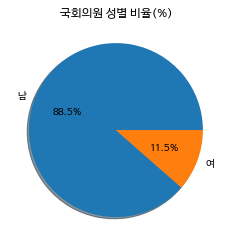

In [29]:
# 국회의원 성별 파이 차트
plt.rc('font', family='NanumBarunGothic') 

plt.pie(x=sex_counts,labels=sex_counts.index, autopct='%.1f%%', shadow=True )
plt.title('국회의원 성별 비율(%)')
plt.show()

**인구 통계 성별**

In [30]:
pop_men.head()

,남자_총인구수,20대~100세 이상,20대,30대,40대,50대,60대,70대,80대,90대,100세 이상
0,25591420,21201746,3508446,3460997,4122023,4304721,3444997,1666057,637685,55744,1076
1,4581312,3888130,688688,715865,727841,727126,593819,312697,112100,9755,239
2,1632912,1381331,217739,208022,251735,267614,256188,133042,43834,3112,45
3,1172995,971271,166556,149250,183346,203505,160716,77153,28656,2064,25
4,1461405,1209573,203934,206083,243495,251150,192852,81222,28159,2613,65


In [31]:
total_men = pop_men.iloc[0,0]
total_women = pop_women.iloc[0,0]
men_percent = round(total_men / (total_men + total_women) * 100, 1)
women_percent = round(total_women / (total_men + total_women) * 100, 1)

men_percent, women_percent

(49.8, 50.2)

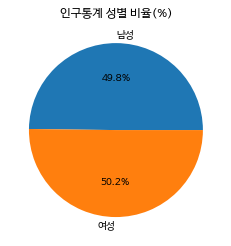

In [32]:
# 인구통계 성별 파이 차트

labels = ['남성','여성']
ratio = [ men_percent, women_percent]

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title("인구통계 성별 비율(%)")
plt.show()

###**연령 + 범주화**

In [33]:
df_21['연령'].describe()

count    253.000000
mean      55.608696
std        6.556912
min       32.000000
25%       52.000000
50%       56.000000
75%       59.000000
max       72.000000
Name: 연령, dtype: float64

In [34]:
# 연령별 범주화 - pd.cut

ages = df_21['연령']
bins = [20,30,40,50,60,70,80,90]
labels = ['20대','30대','40대','50대','60대','70대','80대']
cuts = pd.cut(ages, bins, right=False, labels=labels)
df_21['연령대'] = cuts

In [35]:
df_21.head()

,시도명,선거구명,소속정당명,성명,성별,연령,직업,학력,경력1,경력2,연령대
0,서울특별시,종로구,더불어민주당,이낙연,남,67,정당인,서울대학교 법과대학 법학과 졸업,(현)민주당 코로나19국난극복위원장,(전)제45대 국무총리,60대
1,서울특별시,중구성동구을,더불어민주당,박성준,남,50,정당인,성균관대학교 정치외교학과 정치학 박사,(전) JTBC 아나운서,(현)더불어민주당 중앙당 부대변인,50대
2,서울특별시,용산구,미래통합당,권영세,남,61,변호사,하버드대학교 케네디스쿨 졸업 (행정학석사 2000.7~2001.6),(전) 주중국대한민국 대사,(전) 제16ㆍ17ㆍ18대 국회의원,60대
3,서울특별시,중구성동구갑,더불어민주당,홍익표,남,52,정치인,한양대학교 대학원 정치외교학과 졸업(정치학박사),(현)국회의원(제19대.20대),(전)더불어민주당 수석대변인,50대
4,서울특별시,광진구갑,더불어민주당,전혜숙,여,64,국회의원,성균관대학교 임상약학대학원 약학석사(사회약학),(현) 제20대 광진구갑 국회의원,(현) 국회 행정안전위원회 위원장,60대


In [36]:
age_counts = df_21['연령대'].value_counts()

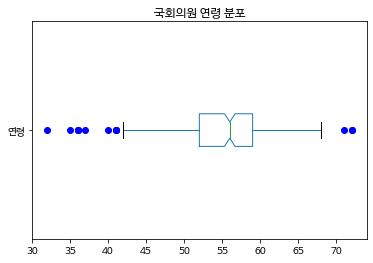

In [37]:
# '연령' 컬럼 박스 플롯
df_21['연령'].plot(kind='box', notch=True, sym='bo',vert=0);
plt.title("국회의원 연령 분포")

plt.show()

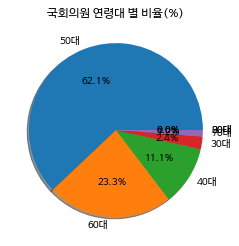

In [38]:
# '연령대' 컬럼 파이 차트 1
plt.pie(x=age_counts, labels=age_counts.index, autopct='%.1f%%', shadow=True )
plt.title("국회의원 연령대 별 비율(%)")
plt.show();

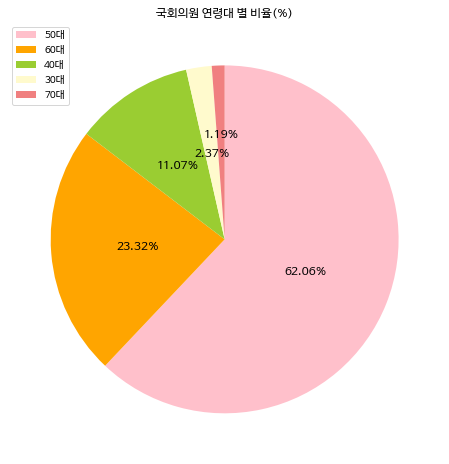

In [39]:
# '연령대' 컬럼 파이 차트 2

colors = ['pink','orange','yellowgreen','lemonchiffon','lightcoral']
labels = age_counts.index
frequency = age_counts

labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)

sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성
 
pie = ax.pie(sorted_frequency, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors, ## 색상 지정
       )
 
total = np.sum(frequency) ## 빈도수 합
 
threshold = 10
sum_pct = 0 ## 퍼센티지
count_less_5pct = 0 ## 5%보다 작은 라벨의 개수
spacing = 0.1
for i,l in enumerate(sorted_labels):
    ang1, ang2 = ax.patches[i].theta1, ax.patches[i].theta2 ## 파이의 시작 각도와 끝 각도
    center, r = ax.patches[i].center, ax.patches[i].r ## 파이의 중심 좌표
    
    ## 비율 상한선보다 작은 것들은 계단형태로 만든다.
    if sorted_frequency[i]/total*100 < threshold:
        x = (r/2+spacing*count_less_5pct)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2+spacing*count_less_5pct)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
        count_less_5pct += 1
    else:
        x = (r/2)*np.cos(np.pi/180*((ang1+ang2)/2)) + center[0] ## 텍스트 x좌표
        y = (r/2)*np.sin(np.pi/180*((ang1+ang2)/2)) + center[1] ## 텍스트 y좌표
    
    ## 퍼센티지 출력
    if i < len(labels) - 1:
        sum_pct += float(f'{sorted_frequency[i]/total*100:.2f}')
        ax.text(x,y,f'{sorted_frequency[i]/total*100:.2f}%',ha='center',va='center',fontsize=12)
    # else: ## 마지막 파이 조각은 퍼센티지의 합이 100이 되도록 비율을 조절
    #     ax.text(x,y,f'{100-sum_pct:.2f}%',ha='center',va='center',fontsize=12)
 
plt.legend(pie[0],labels) ## 범례
plt.title("국회의원 연령대 별 비율(%)")
plt.show()

###**인구 통계 데이터 (연령별/성별)(국내거주자, 2021.09.30 기준)**

In [40]:
pop_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   총인구수         18 non-null     int64
 1   20대~100세 이상  18 non-null     int64
 2   20대          18 non-null     int64
 3   30대          18 non-null     int64
 4   40대          18 non-null     int64
 5   50대          18 non-null     int64
 6   60대          18 non-null     int64
 7   70대          18 non-null     int64
 8   80대          18 non-null     int64
 9   90대          18 non-null     int64
 10  100세 이상      18 non-null     int64
dtypes: int64(11)
memory usage: 1.7 KB


In [41]:
x = np.arange(8)
ages = pop_total.columns[2:]
values = pop_total.iloc[0,2:10]

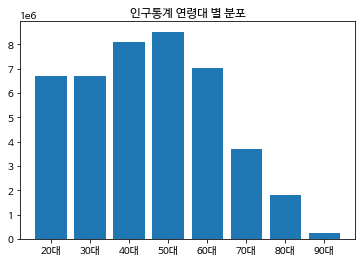

In [42]:
plt.bar(x, values)
plt.xticks(x,ages)
plt.ylim
plt.title("인구통계 연령대 별 분포")

plt.show();

In [43]:
# percentage
trans_pop = pop_total.transpose()
# trans_pop['20~29세':'100세 이상']
trans_pop['percent'] = round(trans_pop[0]/trans_pop.iloc[1,0] *100,1)

In [44]:
# 20 - 100세 이상 총 인구수
trans_pop.iloc[1,0]

42814896

In [45]:
trans_pop['percent'][2:]

20대        15.6
30대        15.7
40대        19.0
50대        19.9
60대        16.4
70대         8.6
80대         4.2
90대         0.6
100세 이상     0.0
Name: percent, dtype: float64

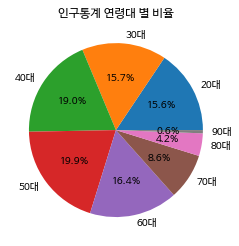

In [46]:
labels = trans_pop.index[2:10]
ratio = trans_pop['percent'][2:10]

plt.pie(ratio, labels=labels, autopct='%1.1f%%')
plt.title("인구통계 연령대 별 비율")
plt.show()

**국회의원 전체 연령대 vs. 인구 통계 연령대**

- 21대 국회의원 중 50대와 60대 국회의원이 압도적인 비율을 차지하고 있음을 알 수 있다. (약 85%)
  - 인구 통계 데이터에서 50+60대 비율은 36.3%로, 같은 나이대 국회의원 비율과 2배 이상 차이나는 모습


- 이 외에 20대는 전무하며, 흔히 '청년층'이라 함께 묶이는 30대와 40대 국회의원의 수도 합쳤을 때, 전체 비율에서 약 13퍼센트만을 차지하고 있다. 
  - 인구 통계 데이터에서 30+40대의 비율은 34.7%로 같은 나이대의 국회의원 비율과 괴리가 있음. 



- 국회의원 선거 후보자 연령대 제한 : 선거일 만 25세 이상의 국민
  - cf. 지방선거 연령대 : 선거일 당일 만 25세 이상의 국민
  - cf. 대통령 후보자 연령대 : 선거일 당일 40살
  - cf. 유권자 연령대 : 18세 이상
- 연령대 별 전국민 분포 통계 : 가장 최근 자료인 2021.09자료 (https://jumin.mois.go.kr/ageStatMonth.do#none)
- 연령대 별 전국민 분포와 비교해보았을 때, 국민의 입장을 대변하는 입법 활동에 대한 의무를 지닌 국회의원이 임기동안 의무를 다 할 수 있을지는 확실치 않다.
  ```
  **인구 통계 데이터**
    20대 : 15.6%
    30대 :15.7%
    40대 :19.0%
    30+40대 : 34.7%
    50대 :19.9%
    60대 :16.4%
    50+60대 : 36.3%
  ```


###**성별 + 연령 groupby**

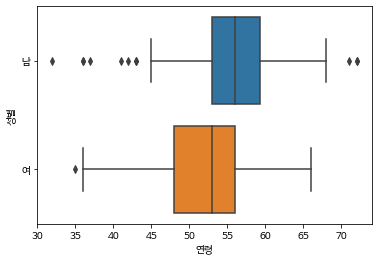

In [47]:
# 성별 + 연령 그룹 박스 플롯

sns.boxplot(x='연령', y='성별', data=df_21)
plt.show()

- 남성 국회의원의 평균 나이대 및 최고 나이대가 여성보다 높음을 알 수 있다. 

###**정당 표기 / 경력 / 학력**
- 국회는 입법 기관으로서 이곳에 소속된 국회의원들의 가장 중요한 의무는 국민의 대리인으로서 국민 권리를 위해 대한민국의 법을 만드는 것이다. 
- 그렇다면, 과연 법과 관련된 이력이 있거나, 법과 관련된 전공을 한 의원들이 다른 이들보다 법안을 만드는 의무에 좀 더 두각을 나타내고 있을까?
- 해당 부분을 평가하는 지표로 "정성들여 만든 법안의 질"도 중요하지만, 데이터로 판가름할 수 있는 "발의 및 가결안의 '양'"을 삼았다. 



In [48]:
new_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5605 entries, 0 to 5604
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DAESU     5605 non-null   int64 
 1   DAE       5605 non-null   object
 2   DAE_NM    5605 non-null   object
 3   NAME      5605 non-null   object
 4   NAME_HAN  5605 non-null   object
 5   JA        90 non-null     object
 6   HO        1383 non-null   object
 7   BIRTH     5605 non-null   object
 8   BON       2777 non-null   object
 9   POSI      4317 non-null   object
 10  HAK       5598 non-null   object
 11  HOBBY     2297 non-null   object
 12  BOOK      1880 non-null   object
 13  SANG      2230 non-null   object
 14  DEAD      5605 non-null   object
 15  URL       5605 non-null   object
dtypes: int64(1), object(15)
memory usage: 700.8+ KB


In [49]:
people = new_people[(new_people['DAESU']==21) | (new_people['DAESU']==20) | (new_people['DAESU']==19)]

In [50]:
people.head()

,DAESU,DAE,DAE_NM,NAME,NAME_HAN,JA,HO,BIRTH,BON,POSI,HAK,HOBBY,BOOK,SANG,DEAD,URL
0,21,제19대국회의원(경남 창원시성산구) 정당_66\r\n제21대국회의원(경남 창원시성산...,21대의원,강기윤,姜起潤,NaN,NaN,1960년 06월 04일,NaN,NaN,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
1,21,제21대국회의원(대구동구을) 정당_74,21대의원,강대식,姜大植,NaN,NaN,1959년 11월 02일,NaN,NaN,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\...",NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
2,21,제21대국회의원(경기안양시만안구) 정당_7,21대의원,강득구,姜得求,NaN,NaN,1963년 05월 27일,NaN,NaN,성균관대학교 한국철학과 학사\r\n연세대학교 행정대학원 정치행정리더십학 석사\r\n...,NaN,2015. 우산이 필요한 당신에게\r\n2019. 득구있다,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
3,21,제21대국회의원(경남진주시을) 정당_74,21대의원,강민국,姜旻局,NaN,NaN,1971년 03월 03일,NaN,NaN,경남대학교 대학원 법학과 졸업(법학박사)\r\n\r\n2004. 진주국제대학교 경찰...,NaN,NaN,NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...
4,21,제21대국회의원(비례대표) 정당_30,21대의원,강민정,姜旼姃,NaN,NaN,1961년 04월 26일,NaN,NaN,서울대학교 사범대학 역사교육과 졸업\r\n\r\n2005. 전국교직원노동조합 서울북...,NaN,"2013. 교사와 학부모가 함께 읽는 주제통합수업\r\n2017. 혁신학교, 한국교...",NaN,년 월 일,http://www.rokps.or.kr/profile/profile_view.as...


**정당 표기**

In [51]:
party = people[['DAESU','DAE','NAME','HAK']]
party.head()

,DAESU,DAE,NAME,HAK
0,21,제19대국회의원(경남 창원시성산구) 정당_66\r\n제21대국회의원(경남 창원시성산...,강기윤,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...
1,21,제21대국회의원(대구동구을) 정당_74,강대식,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\..."
2,21,제21대국회의원(경기안양시만안구) 정당_7,강득구,성균관대학교 한국철학과 학사\r\n연세대학교 행정대학원 정치행정리더십학 석사\r\n...
3,21,제21대국회의원(경남진주시을) 정당_74,강민국,경남대학교 대학원 법학과 졸업(법학박사)\r\n\r\n2004. 진주국제대학교 경찰...
4,21,제21대국회의원(비례대표) 정당_30,강민정,서울대학교 사범대학 역사교육과 졸업\r\n\r\n2005. 전국교직원노동조합 서울북...


In [52]:
party['DAE'][0]

'제19대국회의원(경남 창원시성산구) 정당_66\r\n제21대국회의원(경남 창원시성산구) 정당_74'

In [53]:
str(party['DAESU'][800])

'19'

In [54]:
party['DAE'][0].find(str(party['DAESU'][0]))

28

In [55]:
# 정당 표기
# find(string, start, end) ==> 있으면, 해당 index, 없으면 -1 print
# 20대 ==> 20대 정당 출력 (대수에 맞는 정당 출력)
# 정당, 무소속

party_list = []

# 21, 20, 19 ==> 21대, 20대, 19대로 바꿔놓기 위한 DAESU_2
# 정당 표기에도 숫자가 혼용되어 있기 때문에 확실한 식벽을 위해 '대'를 붙여서 사용
party['DAESU_2'] = np.NaN


for idx in range(len(party)):
  dae = party['DAE'][idx]
  party['DAESU_2'][idx] = str(party['DAESU'][idx])+'대'

  if dae.find('정당',dae.find(str(party['DAESU_2'][idx]))) >= 0:
    if dae.find('무소속', dae.find(str(party['DAESU_2'][idx]))) >=0:
      if dae.find('정당', dae.find(str(party['DAESU_2'][idx]))) < dae.find('무소속', dae.find(str(party['DAESU_2'][idx]))):
        party_list.append(dae[dae.find('정당',dae.find(str(party['DAESU_2'][idx]))): \
        dae.find('정당', dae.find(str(party['DAESU_2'][idx]))) + 5])
      else:
        party_list.append('무소속')

    else:
      party_list.append(dae[dae.find('정당', dae.find(str(party['DAESU_2'][idx]))): \
                                   dae.find('정당', dae.find(str(party['DAESU_2'][idx]))) + 5])
  else:
    party_list.append('무소속')

party['DAE'] = party_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [56]:
party.head()

,DAESU,DAE,NAME,HAK,DAESU_2
0,21,정당_74,강기윤,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...,21대
1,21,정당_74,강대식,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\...",21대
2,21,정당_7,강득구,성균관대학교 한국철학과 학사\r\n연세대학교 행정대학원 정치행정리더십학 석사\r\n...,21대
3,21,정당_74,강민국,경남대학교 대학원 법학과 졸업(법학박사)\r\n\r\n2004. 진주국제대학교 경찰...,21대
4,21,정당_30,강민정,서울대학교 사범대학 역사교육과 졸업\r\n\r\n2005. 전국교직원노동조합 서울북...,21대


In [57]:
party['DAE'].unique()

array(['정당_74', '정당_7', '정당_30', '정당_7\r', '정당_72', '무소속', '정당_75',
       '정당_7)', '정당_6', '정당_6,', '정당_66', '정당_8', '정당_8\r', '정당_25',
       '정당_46', '정당_7,', '정당_45', '정당_70', '정당_12', '정당_52', '정당_34',
       '정당_47'], dtype=object)

In [58]:
party['DAE'].value_counts()

정당_66     288
정당_7\r    171
정당_7      145
정당_45     131
정당_74      84
정당_75      40
무소속        23
정당_6       17
정당_12      13
정당_72      12
정당_52       3
정당_30       3
정당_8\r      2
정당_6,       2
정당_7,       1
정당_7)       1
정당_70       1
정당_8        1
정당_46       1
정당_25       1
정당_34       1
정당_47       1
Name: DAE, dtype: int64

In [59]:
for idx in range(len(party)):
  party['DAE'][idx] = party['DAE'][idx].replace('\r','').replace(',','').replace(')','')

# 쓸모를 다한 ['DAESU_2] 컬럼은 삭제
party.drop(['DAESU_2'],axis=1, inplace=True)
party=party.rename({'DAE':'PARTY'}, axis='columns')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
party.head()

,DAESU,PARTY,NAME,HAK
0,21,정당_74,강기윤,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...
1,21,정당_74,강대식,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\..."
2,21,정당_7,강득구,성균관대학교 한국철학과 학사\r\n연세대학교 행정대학원 정치행정리더십학 석사\r\n...
3,21,정당_74,강민국,경남대학교 대학원 법학과 졸업(법학박사)\r\n\r\n2004. 진주국제대학교 경찰...
4,21,정당_30,강민정,서울대학교 사범대학 역사교육과 졸업\r\n\r\n2005. 전국교직원노동조합 서울북...


In [61]:
party_name = pd.DataFrame(party['PARTY'].value_counts()).reset_index()
party_name

,index,PARTY
0,정당_7,318
1,정당_66,288
2,정당_45,131
3,정당_74,84
4,정당_75,40
5,무소속,23
6,정당_6,19
7,정당_12,13
8,정당_72,12
9,정당_52,3


In [62]:
party_name['PARTY_NAME'] = ['더불어민주당','새누리당','새정치민주연합','미래통합당','국민의당','무소속','국민의힘','통합진보당','정의당','열린민주당','자유한국당','자유선진당','한나라당','자유민주연합','국민의당','국민의당','한나라당' ]

party_name.drop('PARTY',axis=1,inplace=True)

party_name.head()

,index,PARTY_NAME
0,정당_7,더불어민주당
1,정당_66,새누리당
2,정당_45,새정치민주연합
3,정당_74,미래통합당
4,정당_75,국민의당


In [63]:
party_name=party_name.rename({'index':'PARTY'}, axis='columns')

In [64]:
party_name.head()

,PARTY,PARTY_NAME
0,정당_7,더불어민주당
1,정당_66,새누리당
2,정당_45,새정치민주연합
3,정당_74,미래통합당
4,정당_75,국민의당


In [65]:
party = party.merge(party_name, on='PARTY',how='left')

party.head()

,DAESU,PARTY,NAME,HAK,PARTY_NAME
0,21,정당_74,강기윤,창원상남초등학교 \r\n창원남중학교\r\n마산공업고등학교 \r\n창원대학교 행정학...,미래통합당
1,21,정당_74,강대식,"경북대학교 사범대학 부속고등학교\r\n영남대학교 경영대학원 경영학 석사, 박사\r\...",미래통합당
2,21,정당_7,강득구,성균관대학교 한국철학과 학사\r\n연세대학교 행정대학원 정치행정리더십학 석사\r\n...,더불어민주당
3,21,정당_74,강민국,경남대학교 대학원 법학과 졸업(법학박사)\r\n\r\n2004. 진주국제대학교 경찰...,미래통합당
4,21,정당_30,강민정,서울대학교 사범대학 역사교육과 졸업\r\n\r\n2005. 전국교직원노동조합 서울북...,자유선진당


**경력 및 학력 표기(보류)**

**suggest(발의법안 데이터)에 정당 정보 기입**

In [66]:
party_21 = party[party['DAESU']==21]
party_20 = party[party['DAESU']==20]

In [67]:
suggest_20 = suggest[suggest['AGE']==20]
suggest_20.tail()

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER
25604,PRC_S1J6G0G5Q3A0J0H9A1F5Z1T4V8H7L6,2000005,교육기본법 일부개정법률안,교육위원회,2016-05-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,이찬열의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,이찬열,"김경협,백재현,변재일,안규백,오제세,원혜영,이춘석,정성호,조정식"
25605,PRC_M1K6X0P5B3E0V0X9T3U4I3P0A4E3M6,2000004,정부조직법 일부개정법률안,행정안전위원회,2016-05-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,이종배의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,이종배,"권성동,김재경,박덕흠,박명재,배덕광,안상수,이철우,이학재,이현재,주호영"
25606,PRC_W1V6P0D5G3U0I0E9Q2Q1G3C2W7G7I7,2000003,근로기준법 일부개정법률안,환경노동위원회,2016-05-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,이찬열의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,이찬열,"김경협,김현미,민병두,박홍근,변재일,안규백,오제세,원혜영,이춘석,정성호"
25607,PRC_E1Z6M0V5E3V0A0G9C0G9K2M6Q5Y5S8,2000002,빅데이터의 이용 및 산업진흥 등에 관한 법률안,과학기술정보방송통신위원회,2016-05-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,배덕광의원 등 14인,http://likms.assembly.go.kr/bill/coactorListPo...,배덕광,"김세연,김정훈,김한표,박맹우,박주선,유기준,유재중,이종배,이진복,이채익,이헌승,조경..."
25608,PRC_U1M6O0E5N3O0I0T9Z0J2T2J2X1F3Q6,2000001,통일경제파주특별자치시의 설치 및 파주평화경제특별구역의 조성·운영과 지원에 관한 특별법안,외교통일위원회,2016-05-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,박정의원 등 17인,http://likms.assembly.go.kr/bill/coactorListPo...,박정,"김경협,노웅래,박광온,박영선,박지원,박찬대,소병훈,송영길,신경민,오제세,윤후덕,이찬..."


In [68]:
suggest_21['NAME'] = suggest_21['대표발의자']
suggest_20['NAME'] = suggest_20['RST_PROPOSER']

suggest_21 = suggest_21.merge(party_21, on='NAME' ,how='left')
suggest_20 = suggest_20.merge(party_20, on='NAME', how='left')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
suggest_21.drop(['DAESU','PARTY','HAK'],axis=1, inplace=True)

In [70]:
suggest_20.drop(['DAESU','PARTY','HAK'],axis=1, inplace=True)

In [71]:
suggest_21[suggest_21['PARTY_NAME'].isnull()]

,의안번호,대수,법률안명,제안자,대표발의자,공동발의자,상세페이지,소관위원회,제안일,처리상태,제안자목록링크,NAME,PARTY_NAME
6640,2112788,21,문화재보호법 일부개정법률안,김의겸의원 등 10인,김의겸,"강민정,김승남,김정호,남인순,민형배,서동용,장경태,조오섭,최기상",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-10-05,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,NaN
7804,2111462,21,지역신문발전지원 특별법 일부개정법률안,김의겸의원 등 10인,김의겸,"강민정,김승원,김종민,김홍걸,민형배,서동용,장경태,정필모,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-07-12,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,NaN
8395,2110817,21,신문 등의 진흥에 관한 법률 일부개정법률안,김의겸의원등12인,김의겸,"강민정,권인숙,김승원,김종민,박상혁,박영순,서동용,양정숙,이동주,이수진,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-06-16,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,NaN
8396,2110816,21,정부기관 및 공공법인 등의 광고시행에 관한 법률 일부개정법률안,김의겸의원등11인,김의겸,"강민정,권인숙,김승원,김종민,박영순,서동용,양정숙,이동주,이수진,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-06-16,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,NaN
8409,2110802,21,신문 등의 진흥에 관한 법률 일부개정법률안,김의겸의원등11인,김의겸,"강민정,권인숙,김승원,김종민,박영순,서동용,이동주,이수진,장경태,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-06-15,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,NaN


In [72]:
# 21대 김의겸의원만 소속 정당이 null
# 한번에 하려니 안된다... ==> 따로 떼주고, 수정 후에 다시 붙여주기!

suggest_21_null = suggest_21[suggest_21['PARTY_NAME'].isnull()]
suggest_21 = suggest_21[suggest_21['PARTY_NAME'].notnull()]

suggest_21_kim = suggest_21_null[suggest_21_null['대표발의자'] == '김의겸']
suggest_21_kim['PARTY_NAME'] = '열린민주당'

suggest_21 = suggest_21.append(suggest_21_kim)
suggest_21.shape


(11907, 13)

In [73]:
# 21대 국회 김의겸 의원 정당 수정 완료
suggest_21[suggest_21['NAME']=='김의겸']

,의안번호,대수,법률안명,제안자,대표발의자,공동발의자,상세페이지,소관위원회,제안일,처리상태,제안자목록링크,NAME,PARTY_NAME
6640,2112788,21,문화재보호법 일부개정법률안,김의겸의원 등 10인,김의겸,"강민정,김승남,김정호,남인순,민형배,서동용,장경태,조오섭,최기상",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-10-05,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,열린민주당
7804,2111462,21,지역신문발전지원 특별법 일부개정법률안,김의겸의원 등 10인,김의겸,"강민정,김승원,김종민,김홍걸,민형배,서동용,장경태,정필모,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-07-12,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,열린민주당
8395,2110817,21,신문 등의 진흥에 관한 법률 일부개정법률안,김의겸의원등12인,김의겸,"강민정,권인숙,김승원,김종민,박상혁,박영순,서동용,양정숙,이동주,이수진,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-06-16,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,열린민주당
8396,2110816,21,정부기관 및 공공법인 등의 광고시행에 관한 법률 일부개정법률안,김의겸의원등11인,김의겸,"강민정,권인숙,김승원,김종민,박영순,서동용,양정숙,이동주,이수진,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-06-16,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,열린민주당
8409,2110802,21,신문 등의 진흥에 관한 법률 일부개정법률안,김의겸의원등11인,김의겸,"강민정,권인숙,김승원,김종민,박영순,서동용,이동주,이수진,장경태,최강욱",http://likms.assembly.go.kr/bill/billDetail.do...,문화체육관광위원회,2021-06-15,NaN,http://likms.assembly.go.kr/bill/coactorListPo...,김의겸,열린민주당


In [74]:
# 20대 국회 - 김종태 의원의 소속 정당 null

suggest_20[suggest_20['PARTY_NAME'].isnull()]

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER,NAME,PARTY_NAME
17046,PRC_Z1R7G0B1K2J5W1Q8R1L2B2S2R2U4X4,2005297,해사안전법 일부개정법률안,농림축산식품해양수산위원회,2017-01-25,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성찬,김해영,박명재,안상수,윤영일,이양수,이종배,이철우,정태옥,홍문표",김종태,NaN
17864,PRC_G1I6K1J2A1Q2T1H7E3B3R5U1R0P1M3,2004317,부동산소유권 이전등기 등에 관한 특별조치법안,법제사법위원회,2016-12-12,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김태흠,박명재,위성곤,윤종필,이철우,홍문표,홍철호",김종태,NaN
17880,PRC_B1T6M1D2Y1V2P1H3P3O9E2H0T1E1J7,2004301,전기사업법 일부개정법률안,산업통상자원중소벤처기업위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김중로,김현아,박명재,윤종필,이종명,이종배,장석춘,홍문표",김종태,NaN
17884,PRC_C1F6D1B2X1W2H1S1T3B8I0G3N2S0Z1,2004297,가축분뇨의 관리 및 이용에 관한 법률 일부개정법률안,환경노동위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김태흠,김현아,박명재,윤영일,윤종필,이철우,장석춘,홍문표,홍철호",김종태,NaN
17885,PRC_J1U6T1D2P1E2S1I1Q3O0U4C9R7T4E3,2004296,산림자원의 조성 및 관리에 관한 법률 일부개정법률안,농림축산식품해양수산위원회,2016-12-12,폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김중로,김현아,박명재,윤종필,이철우,홍문표,홍철호",김종태,NaN
17886,PRC_T1J6I1K2T1L2Y1P1Z2T8P5C9U1D1S8,2004295,자유무역협정 체결에 따른 농어업인 등의 지원에 관한 특별법 일부개정법률안,농림축산식품해양수산위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김중로,김현아,박명재,위성곤,윤영일,윤종필,이철우,홍문표,홍철호",김종태,NaN
17887,PRC_M1X6O1A2F1L2Q1F1Z2X8E3E0X4I3O7,2004294,수도법 일부개정법률안,환경노동위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김현아,박명재,신상진,윤종필,이종명,홍문표",김종태,NaN
18481,PRC_X1C6K1T1N1Y4E1L6M3M8X5M1H6Z6P8,2003556,수자원의 조사ㆍ계획 및 관리에 관한 법률안,국토교통위원회,2016-11-14,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성태,김현아,박맹우,박명재,박순자,박완수,안규백,이헌승,정용기,최경환",김종태,NaN
21199,PRC_U1K6F0X6D3I0M1I5Q1N8F4D7N3A3E3,2000600,6·25전쟁 전후 비정규군 공로자 보상에 관한 법률안,국방위원회,2016-06-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성태,김중로,김학용,박덕흠,박맹우,안규백,이명수,이우현,이종명,이학재",김종태,NaN
21250,PRC_T1H6M0T6P2Q8H1F4R4Y7N2Z6M3X4V1,2000523,부정청탁 및 금품등 수수의 금지에 관한 법률 일부개정법률안,정무위원회,2016-06-28,폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 13인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성원,김성찬,김태흠,박덕흠,백승주,안규백,안상수,유성엽,이만희,이명수,홍문표,황주홍",김종태,NaN


In [75]:
# null 값 채우기 - 20대 김종태 의원은 '새누리당' 소속
suggest_20_null = suggest_20[suggest_20['PARTY_NAME'].isnull()]
suggest_20 = suggest_20[suggest_20['PARTY_NAME'].notnull()]

suggest_20_kim = suggest_20_null[suggest_20_null['RST_PROPOSER'] == '김종태']
suggest_20_kim['PARTY_NAME'] = '새누리당'

suggest_20 = suggest_20.append(suggest_20_kim)
suggest_20.shape

(21696, 14)

In [76]:
suggest_20[suggest_20['NAME']=='김종태']

,BILL_ID,BILL_NO,BILL_NAME,COMMITTEE,PROPOSE_DT,PROC_RESULT,AGE,DETAIL_LINK,PROPOSER,MEMBER_LIST,RST_PROPOSER,PUBL_PROPOSER,NAME,PARTY_NAME
17046,PRC_Z1R7G0B1K2J5W1Q8R1L2B2S2R2U4X4,2005297,해사안전법 일부개정법률안,농림축산식품해양수산위원회,2017-01-25,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성찬,김해영,박명재,안상수,윤영일,이양수,이종배,이철우,정태옥,홍문표",김종태,새누리당
17864,PRC_G1I6K1J2A1Q2T1H7E3B3R5U1R0P1M3,2004317,부동산소유권 이전등기 등에 관한 특별조치법안,법제사법위원회,2016-12-12,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김태흠,박명재,위성곤,윤종필,이철우,홍문표,홍철호",김종태,새누리당
17880,PRC_B1T6M1D2Y1V2P1H3P3O9E2H0T1E1J7,2004301,전기사업법 일부개정법률안,산업통상자원중소벤처기업위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김중로,김현아,박명재,윤종필,이종명,이종배,장석춘,홍문표",김종태,새누리당
17884,PRC_C1F6D1B2X1W2H1S1T3B8I0G3N2S0Z1,2004297,가축분뇨의 관리 및 이용에 관한 법률 일부개정법률안,환경노동위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김태흠,김현아,박명재,윤영일,윤종필,이철우,장석춘,홍문표,홍철호",김종태,새누리당
17885,PRC_J1U6T1D2P1E2S1I1Q3O0U4C9R7T4E3,2004296,산림자원의 조성 및 관리에 관한 법률 일부개정법률안,농림축산식품해양수산위원회,2016-12-12,폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김중로,김현아,박명재,윤종필,이철우,홍문표,홍철호",김종태,새누리당
17886,PRC_T1J6I1K2T1L2Y1P1Z2T8P5C9U1D1S8,2004295,자유무역협정 체결에 따른 농어업인 등의 지원에 관한 특별법 일부개정법률안,농림축산식품해양수산위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 12인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김중로,김현아,박명재,위성곤,윤영일,윤종필,이철우,홍문표,홍철호",김종태,새누리당
17887,PRC_M1X6O1A2F1L2Q1F1Z2X8E3E0X4I3O7,2004294,수도법 일부개정법률안,환경노동위원회,2016-12-12,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 10인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"강석호,김석기,김성찬,김현아,박명재,신상진,윤종필,이종명,홍문표",김종태,새누리당
18481,PRC_X1C6K1T1N1Y4E1L6M3M8X5M1H6Z6P8,2003556,수자원의 조사ㆍ계획 및 관리에 관한 법률안,국토교통위원회,2016-11-14,대안반영폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성태,김현아,박맹우,박명재,박순자,박완수,안규백,이헌승,정용기,최경환",김종태,새누리당
21199,PRC_U1K6F0X6D3I0M1I5Q1N8F4D7N3A3E3,2000600,6·25전쟁 전후 비정규군 공로자 보상에 관한 법률안,국방위원회,2016-06-30,임기만료폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 11인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성태,김중로,김학용,박덕흠,박맹우,안규백,이명수,이우현,이종명,이학재",김종태,새누리당
21250,PRC_T1H6M0T6P2Q8H1F4R4Y7N2Z6M3X4V1,2000523,부정청탁 및 금품등 수수의 금지에 관한 법률 일부개정법률안,정무위원회,2016-06-28,폐기,20,http://likms.assembly.go.kr/bill/billDetail.do...,김종태의원 등 13인,http://likms.assembly.go.kr/bill/coactorListPo...,김종태,"김성원,김성찬,김태흠,박덕흠,백승주,안규백,안상수,유성엽,이만희,이명수,홍문표,황주홍",김종태,새누리당


#**대표 발의자별 / 정당별 법안 발의 횟수 + 가결율**
- 활용 데이터 
  ```
  suggest.csv (출처 : 데이콘, 1대 국회 ~ 21대 국회 발의 법안 모음)
  suggest_21.csv(출처 : 열려라 국회 - 21대 국회 발의 법안(가장 최근 것까지 업데이트)
  ```

- 발의된 법안 : 가결 vs 폐기
  ```
    - 가결 : 법안의 '내용'이 본회의에 부의됨. 
        원안가결: 제안된 법안이 수정 없이 본회의 심사를 통과
        수정가결: 제안된 법안이 본회의에서 수정되어 통과
        대안반영폐기: 다른 의안과 하나로 통합돼 본회의에 부의되지 않음
        수정안반영폐기: 다른 의안에 내용을 일부 또는 전부 반영하여 본회의에 부의되지 않음
    - 폐기
        임기만료폐기: 국회의원의 임기가 끝날 경우 국회에 제출된 법률안이 폐기됨
        폐기: 제안된 법안이 심사를 통과하지 못하여 본회의에 회부되지 못함
        철회: 제안된 법안이 제안자에 의해 철회됨
  ```

- 생각해보아야 할 것

```
- 발의안 자기 복제에 대한 문제(http://newslabit.hankyung.com/article/201906260653G) 
    - 핵심은 국회의원의 본업인 법안 발의에 대한 정확한 평가 지표가 없다는 점
    - 따라서 발의 횟수보다, '가결 횟수가 중요'
    - 최소한의 법안 발의 의무 기준을 "전체 의원 발의 횟수 평균 이상"으로 잡고, 이 이상인 의원만 추려내어 '가결률' 분석
      - 1개 법안 발의 => 가결 => 가결률 100% 
      - 100개 법안 발의 => 60개 가결 => 가결률 60% 
      - 위 두 사례의 경우를 방지하기 위해서.

- '대표 발의자'로서 법안 제출 횟수가 중요한 이유 (http://newslabit.hankyung.com/article/201804195943G)
- 성별/ 학력/ 경력이 법안 발의라는 국회의원의 최우선 의무 실행 능력과 결부하는가?

```
- 정당 관련
  - 기존 정당 의석 수 대비, 발의율, 가결율의 비례하는가에 대해서도 생각해볼 수 있음. 
  - 발의를 많이 하는 정당이 가결도 많이 되는가? 에 대해서도 


*그러나 발의를 많이 한 의원도 국회의원으로서의 책무를 다했다고 볼 수 는 없습니다. 모든 발의 법안을 새로이 만든 것이 아니라, 자기 복제 수준의 법안들을 계속 발의했기 때문입니다.*
> 참고 기사 : http://newslabit.hankyung.com/article/201906260653G

*법안 자기 복제 검증에는 TF-IDF 알고리즘을 사용했습니다. 법안에서 키워드를 추출하고 키워드가 동일한 법안끼리 묶었습니다.*



In [77]:
suggest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62658 entries, 0 to 62657
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BILL_ID        62658 non-null  object
 1   BILL_NO        62658 non-null  int64 
 2   BILL_NAME      62658 non-null  object
 3   COMMITTEE      61821 non-null  object
 4   PROPOSE_DT     62651 non-null  object
 5   PROC_RESULT    58842 non-null  object
 6   AGE            62658 non-null  int64 
 7   DETAIL_LINK    62658 non-null  object
 8   PROPOSER       62657 non-null  object
 9   MEMBER_LIST    62658 non-null  object
 10  RST_PROPOSER   62566 non-null  object
 11  PUBL_PROPOSER  59950 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.7+ MB


In [78]:
suggest_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11907 entries, 0 to 8409
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   의안번호        11907 non-null  int64 
 1   대수          11907 non-null  int64 
 2   법률안명        11907 non-null  object
 3   제안자         11907 non-null  object
 4   대표발의자       11907 non-null  object
 5   공동발의자       11907 non-null  object
 6   상세페이지       11907 non-null  object
 7   소관위원회       11880 non-null  object
 8   제안일         11907 non-null  object
 9   처리상태        2519 non-null   object
 10  제안자목록링크     11907 non-null  object
 11  NAME        11907 non-null  object
 12  PARTY_NAME  11907 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.3+ MB


In [79]:
suggest_21.isnull().sum()

의안번호             0
대수               0
법률안명             0
제안자              0
대표발의자            0
공동발의자            0
상세페이지            0
소관위원회           27
제안일              0
처리상태          9388
제안자목록링크          0
NAME             0
PARTY_NAME       0
dtype: int64

### **법안 처리 현황(21대)**
- 21대 국회는 임기 종료 전이므로, '임기만료폐기' 카테고리가 존재하지 X

대안반영폐기    1810
수정가결       358
원안가결       160
철회         121
폐기          70
Name: 처리상태, dtype: int64

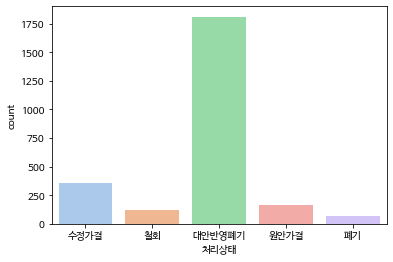

In [80]:
sns.set_palette("pastel")
sns.countplot(data= suggest_21, x= '처리상태' )
suggest_21['처리상태'].value_counts()

In [81]:
# 가결 / 폐기 카테고리 분류 매핑

map = {'대안반영폐기':'가결',
       '수정가결':'가결',
       '원안가결':'가결',
       '폐기':'폐기',
       '철회':'폐기',
       '임기만료폐기':'폐기' }

suggest_21["가결상태"] = suggest_21['처리상태'].map(map)

In [82]:
suggest_21.isnull().sum()

의안번호             0
대수               0
법률안명             0
제안자              0
대표발의자            0
공동발의자            0
상세페이지            0
소관위원회           27
제안일              0
처리상태          9388
제안자목록링크          0
NAME             0
PARTY_NAME       0
가결상태          9388
dtype: int64

가결    2328
폐기     191
Name: 가결상태, dtype: int64

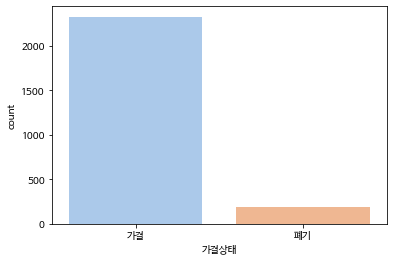

In [83]:
sns.set_palette("pastel")
sns.countplot(data= suggest_21, x= '가결상태' )
suggest_21['가결상태'].value_counts()

### **대표 발의자 별 법안 제출수 (21대)**

In [84]:
# 발의 법안 전체 경우 (가결안 + 폐기안)
suggest_21['대표발의자'].value_counts()

이수진    280
민형배    170
김병욱    166
정청래    155
정춘숙    125
      ... 
조수진      5
이상직      5
김의겸      5
윤건영      5
김태년      3
Name: 대표발의자, Length: 298, dtype: int64

In [85]:
# 전체 의원 발의 법안 개수 평균 - 21대 (2020년 5월 30일 ~ 2021년 10월 5일 )
suggest_mean_21 = suggest_21['대표발의자'].value_counts().mean()
print("21대 국회의원 평균 법안 발의 횟수: ", round(suggest_mean_21,1),"개")

21대 국회의원 평균 법안 발의 횟수:  40.0 개


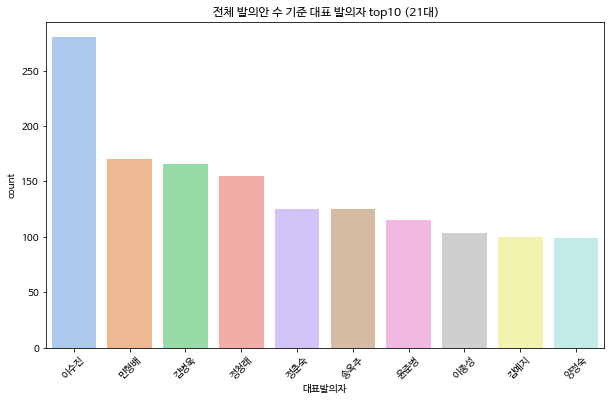

In [86]:
# 법안 발의(가결안 + 폐기안) top 10

plt.figure(figsize=(10,6))  # sns.countplot 코드 밑에 코드 작성시 적용 X
sns.countplot(data=suggest_21,
              x = '대표발의자',
              order = suggest_21['대표발의자'].value_counts()[:10].index)
plt.title(" 전체 발의안 수 기준 대표 발의자 top10 (21대)")
plt.xticks(rotation=45)
plt.show();

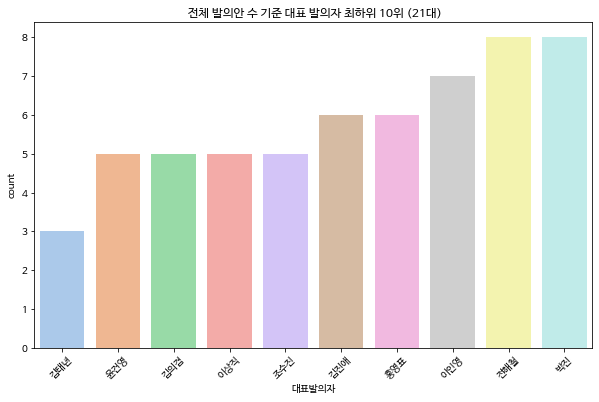

In [87]:
# 법안 발의(가결안 + 폐기안) 최하위 10위

plt.figure(figsize=(10,6))  # sns.countplot 코드 밑에 코드 작성시 적용 X
sns.countplot(data=suggest_21,
              x = '대표발의자',
              order = suggest_21['대표발의자'].value_counts(ascending=True)[:10].index)
plt.title(" 전체 발의안 수 기준 대표 발의자 최하위 10위 (21대)")
plt.xticks(rotation=45)
plt.show();

In [88]:
# 발의 법안 중 가결안 경우 (only 가결안)
suggest_21[suggest_21['가결상태']=='가결']['대표발의자'].value_counts()

이수진    46
송옥주    33
서영교    32
김병욱    32
임이자    31
       ..
신원식     1
이낙연     1
최형두     1
안병길     1
송영길     1
Name: 대표발의자, Length: 284, dtype: int64

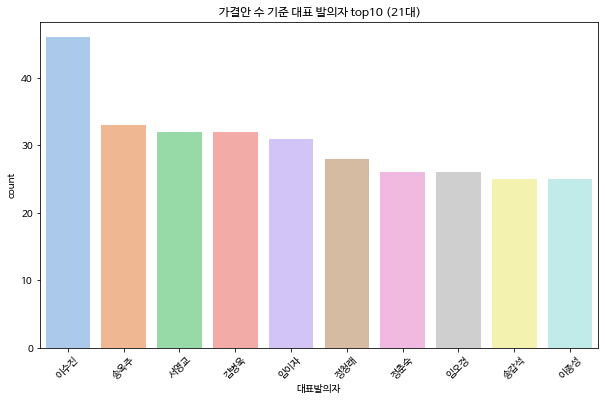

In [89]:
# 법안 발의 (가결안) top 10

plt.figure(figsize=(10,6)) # sns.countplot 코드 밑에 코드 작성시 적용 X

sns.countplot(data = suggest_21[suggest_21['가결상태']=='가결'],
              x = '대표발의자',
              order = suggest_21[suggest_21['가결상태']=='가결']['대표발의자'].value_counts()[:10].index)
plt.title(" 가결안 수 기준 대표 발의자 top10 (21대)")
plt.xticks(rotation=45)
plt.show();

###**가결률 (21대)**

In [90]:
# 발의 법안 전체 경우 (가결안 + 폐기안) - 21대 국회
# suggest_mean_21 = suggest_21['대표발의자'].value_counts().mean() >> 39.2개
# 발의 법안이 전체 평균 이상인 의원만 추려내어 '가결률' 분석

bill_sum_21 = suggest_21['대표발의자'].value_counts()
bill_sum_21_over_m = bill_sum_21[bill_sum_21 > suggest_mean_21]


# 발의 법안 중 가결안 경우 (only 가결안)
bill_pass_21 = suggest_21[suggest_21['가결상태']=='가결']['대표발의자'].value_counts()


In [91]:
bill_sum_21_over_m

이수진    280
민형배    170
김병욱    166
정청래    155
정춘숙    125
      ... 
김홍걸     41
서영석     41
윤재옥     40
김미애     40
김민기     40
Name: 대표발의자, Length: 118, dtype: int64

In [92]:
# 평균 발의 횟수 이상 - 가결률

pass_percent_21 = round(bill_pass_21 / bill_sum_21_over_m, 2)
pass_percent_21.sort_values(ascending = False)[:10]

안호영    0.49
임이자    0.46
이주환    0.39
김성주    0.38
박재호    0.35
김경협    0.33
정필모    0.33
박홍근    0.33
남인순    0.33
송갑석    0.33
Name: 대표발의자, dtype: float64

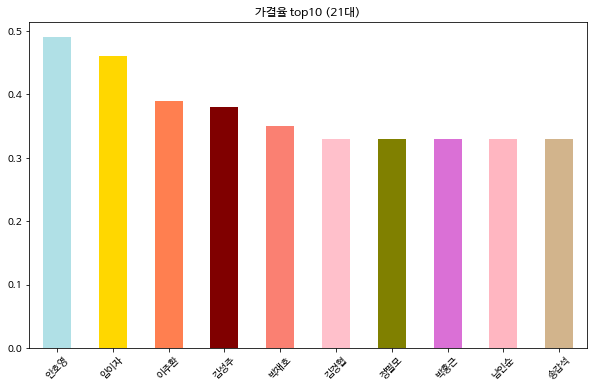

In [93]:
# 가결율 top 10 (21대)
plt.figure(figsize = (10,6))

colors=['powderblue', 'gold', 'coral', 'maroon', 'salmon', 'pink', 'olive', 'orchid', 'lightpink','tan'] 
pass_percent_21.sort_values(ascending = False)[:10].plot(kind='bar', color= colors)
plt.title("가결율 top10 (21대)")
plt.xticks(rotation=45)
plt.show()

###**정당 별 법안 제출 수 및 가결율 (21대)**

In [94]:
# 법안 제출 수 
party_sum_21 = suggest_21['PARTY_NAME'].value_counts()
party_sum_21.values

array([7832, 2975,  633,  165,  157,   74,   66,    5])

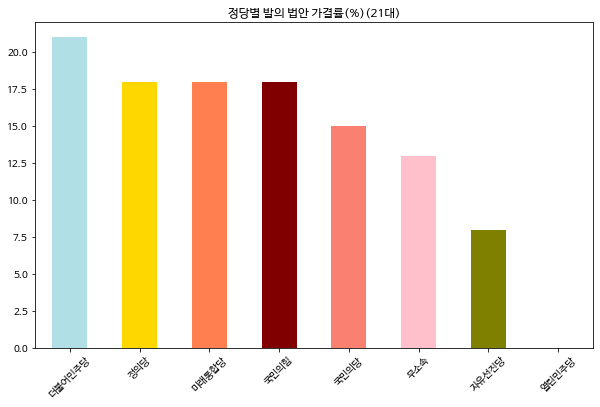

In [95]:
# 가결률 - 많은 의석을 차지한 더불어민주당이 당연히 많은 법안을 발의할 것이므로, 가결률을 확인한다. 
plt.figure(figsize=(10,6))


party_pass_21 = suggest_21[suggest_21['가결상태']=='가결']['PARTY_NAME'].value_counts()

party_percent_21 = round(party_pass_21 / party_sum_21, 2)*100
party_percent_21.sort_values(ascending=False).plot(kind='bar', color=colors)

plt.xticks(rotation=45)
plt.title("정당별 발의 법안 가결률(%)(21대)")
plt.show();

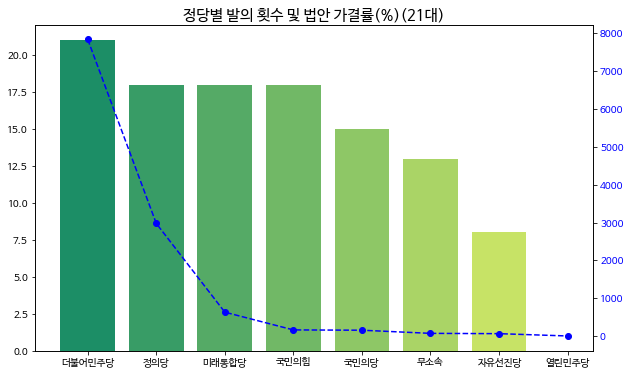

In [96]:
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot() # axes 생성

colors = sns.color_palette('summer',len(party_percent_21)) 

xtick_label_position = list(range(len(party_percent_21))) # x축 눈금 표시 좌표
ax1.set_xticks(xtick_label_position) # x축 눈금 표시
ax1.set_xticklabels(party_percent_21.sort_values(ascending=False).index) # x축 눈금 라벨
ax1.bar(xtick_label_position, party_percent_21.sort_values(ascending=False).values,color=colors) #바차트 출력


color = 'blue'
ax2 = ax1.twinx() #새로운 axis 생성
ax2.plot(xtick_label_position, party_sum_21.values, color=color, linestyle='--',marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("정당별 발의 횟수 및 법안 가결률(%)(21대)", fontsize=15)
# plt.xticks(rotation=45)
plt.show();




### **법안 처리 현황(20대)**


임기만료폐기     14716
대안반영폐기      5156
수정가결         872
원안가결         570
철회           215
폐기           124
수정안반영폐기       41
부결             2
Name: PROC_RESULT, dtype: int64

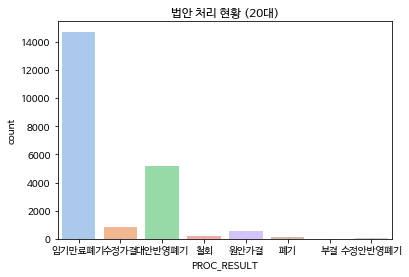

In [97]:
sns.set_palette("pastel")
sns.countplot(data= suggest_20, x= 'PROC_RESULT' )
plt.title("법안 처리 현황 (20대)")

suggest_20['PROC_RESULT'].value_counts()

In [98]:
# 가결 / 폐기 카테고리 분류 매핑

map_20 = {'대안반영폐기':'가결',
       '수정가결':'가결',
       '원안가결':'가결',
       '수정안반영폐기':'가결',
       '임기만료폐기':'폐기',
       '폐기':'폐기',
       '철회':'폐기' }

suggest_20['RESULT'] = suggest_20['PROC_RESULT'].map(map_20)

In [99]:
suggest_20.isnull().sum()

BILL_ID          0
BILL_NO          0
BILL_NAME        0
COMMITTEE        4
PROPOSE_DT       0
PROC_RESULT      0
AGE              0
DETAIL_LINK      0
PROPOSER         0
MEMBER_LIST      0
RST_PROPOSER     0
PUBL_PROPOSER    3
NAME             0
PARTY_NAME       0
RESULT           2
dtype: int64

폐기    15055
가결     6639
Name: RESULT, dtype: int64

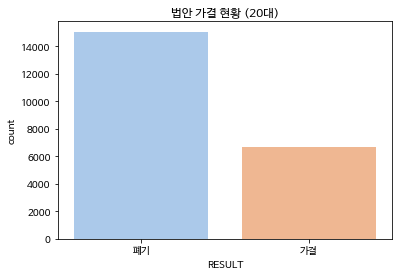

In [100]:
sns.set_palette("pastel")
sns.countplot(data= suggest_20, x= 'RESULT' )
plt.title("법안 가결 현황 (20대)")
suggest_20['RESULT'].value_counts()

### **대표 발의자 별 법안 제출수 (20대)**

In [101]:
# 발의 법안 전체 경우 (가결안 + 폐기안) - 20대 국회
suggest_20['RST_PROPOSER'].value_counts()

황주홍    696
박광온    389
이찬열    324
김도읍    238
박정     228
      ... 
허윤정      4
이군현      4
김무성      2
진영       2
김종인      1
Name: RST_PROPOSER, Length: 318, dtype: int64

In [102]:
# 전체 의원 발의 법안 개수 평균 - 20대
suggest_mean_20 = suggest_20['RST_PROPOSER'].value_counts().mean()
print("20대 국회의원 평균 법안 발의 횟수: ", round(suggest_mean_20,1),"개")

20대 국회의원 평균 법안 발의 횟수:  68.2 개


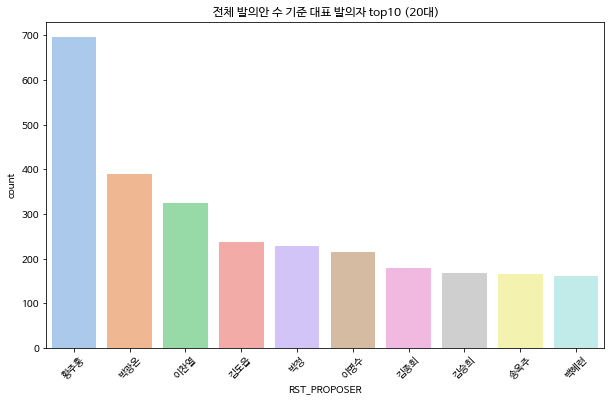

In [103]:
# 법안 발의(가결안 + 폐기안) top 10

plt.figure(figsize=(10,6))  # sns.countplot 코드 밑에 코드 작성시 적용 X
sns.countplot(data=suggest_20,
              x = 'RST_PROPOSER',
              order = suggest_20['RST_PROPOSER'].value_counts()[:10].index)
plt.title(" 전체 발의안 수 기준 대표 발의자 top10 (20대)")
plt.xticks(rotation=45)
plt.show();

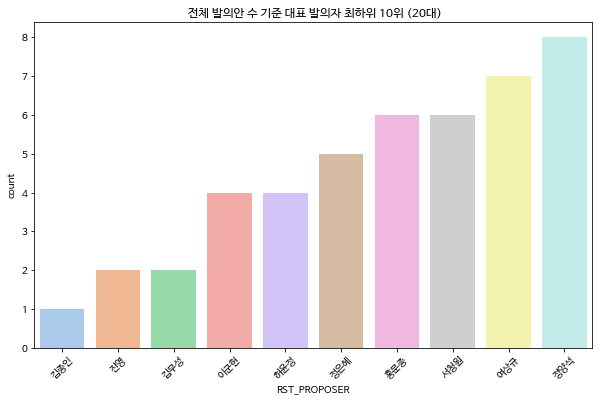

In [104]:
# 법안 발의(가결안 + 폐기안) 최하위 10위

plt.figure(figsize=(10,6))  # sns.countplot 코드 밑에 코드 작성시 적용 X
sns.countplot(data=suggest_20,
              x = 'RST_PROPOSER',
              order = suggest_20['RST_PROPOSER'].value_counts(ascending=True)[:10].index)
plt.title(" 전체 발의안 수 기준 대표 발의자 최하위 10위 (20대)")
plt.xticks(rotation=45)
plt.show();

In [105]:
# 발의 법안 중 가결안 경우 (only 가결안)
suggest_20[suggest_20['RESULT']=='가결']['RST_PROPOSER'].value_counts()

황주홍    214
박광온    137
이찬열    127
이명수     95
김종회     81
      ... 
최재성      1
허윤정      1
서청원      1
김종훈      1
김재경      1
Name: RST_PROPOSER, Length: 310, dtype: int64

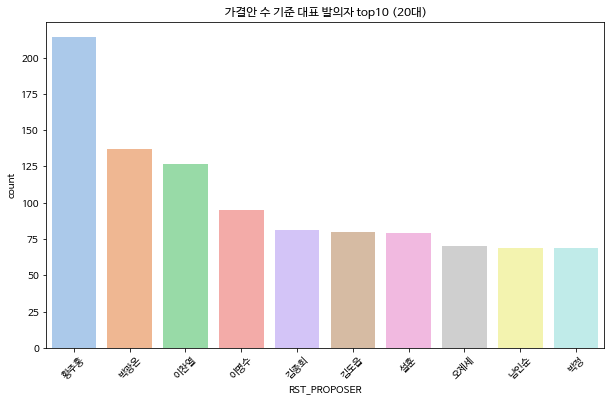

In [106]:
# 법안 발의 (가결안) top 10

plt.figure(figsize=(10,6)) # sns.countplot 코드 밑에 코드 작성시 적용 X

sns.countplot(data = suggest_20[suggest_20['RESULT']=='가결'],
              x = 'RST_PROPOSER',
              order = suggest_20[suggest_20['RESULT']=='가결']['RST_PROPOSER'].value_counts()[:10].index)
plt.title(" 가결안 수 기준 대표 발의자 top10 (20대)")
plt.xticks(rotation=45)
plt.show();

In [107]:
suggest_20['RST_PROPOSER']

0        김병관
1        김병관
2        채이배
3        문진국
4        송석준
        ... 
17886    김종태
17887    김종태
18481    김종태
21199    김종태
21250    김종태
Name: RST_PROPOSER, Length: 21696, dtype: object

###**가결률 (20대)**

In [108]:
# 발의 법안 전체 경우 (가결안 + 폐기안) - 20대 국회
# suggest_mean_20 = suggest_20['RST_PROPOSER'].value_counts().mean()

bill_sum = suggest_20['RST_PROPOSER'].value_counts()
bill_sum_20_over_m = bill_sum[bill_sum > suggest_mean_20]

# 발의 법안 중 가결안 경우 (only 가결안)
bill_pass = suggest_20[suggest_20['RESULT']=='가결']['RST_PROPOSER'].value_counts()

In [109]:
bill_sum_20_over_m[:20]

황주홍    696
박광온    389
이찬열    324
김도읍    238
박정     228
이명수    215
김종회    180
김승희    167
송옥주    166
백혜련    160
김삼화    160
박홍근    158
함진규    156
최도자    155
설훈     154
주승용    154
김관영    153
신창현    152
김광수    152
서영교    151
Name: RST_PROPOSER, dtype: int64

In [110]:
# 평균 발의 횟수 이상 - 가결률
pass_percent = round(bill_pass / bill_sum_20_over_m , 2)

pass_percent.sort_values(ascending = False)[:10]

조정식    0.67
김상훈    0.62
김현권    0.61
박완주    0.59
오제세    0.56
양승조    0.55
추경호    0.54
김성찬    0.53
김기선    0.52
설훈     0.51
Name: RST_PROPOSER, dtype: float64

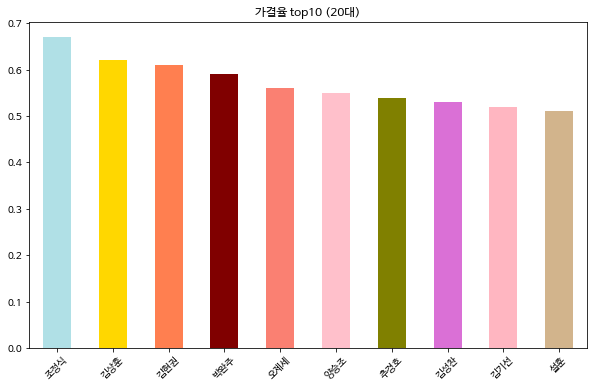

In [111]:
# 가결율 top 10
plt.figure(figsize = (10,6))
# sns.barplot(data = pass_percent,
#             order = pass_percent.sort_values(ascending = False)[:10] )


colors=['powderblue', 'gold', 'coral', 'maroon', 'salmon', 'pink', 'olive', 'orchid', 'lightpink','tan'] 
pass_percent.sort_values(ascending = False)[:10].plot(kind='bar', color= colors)
plt.title("가결율 top10 (20대)")
plt.xticks(rotation=45)
plt.show()

###**정당 별 법안 제출 수 및 가결율 (20대)**

In [112]:
# 법안 제출 수 
party_sum_20 = suggest_20['PARTY_NAME'].value_counts()
party_sum_20

더불어민주당    11065
새누리당       6283
국민의당       3508
정의당         405
무소속         373
자유한국당        62
Name: PARTY_NAME, dtype: int64

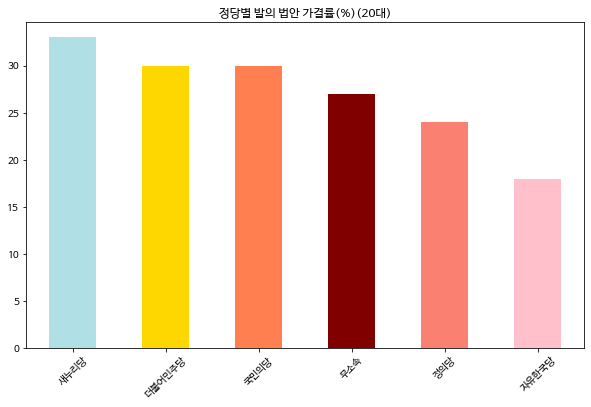

In [113]:
# 가결률 - 많은 의석을 차지한 더불어민주당이 당연히 많은 법안을 발의할 것이므로, 가결률을 확인한다. 
plt.figure(figsize=(10,6))

party_pass_20 = suggest_20[suggest_20['RESULT']=='가결']['PARTY_NAME'].value_counts()

olors=['maroon', 'powderblue', 'coral', 'salmon', 'pink',  'gold']  
party_percent_20 = round(party_pass_20 / party_sum_20, 2)*100
party_percent_20.sort_values(ascending=False).plot(kind='bar', color=colors)

plt.xticks(rotation=45)
plt.title("정당별 발의 법안 가결률(%)(20대)")
plt.show();

In [114]:
party_percent_20.sort_values(ascending=False)

새누리당      33.0
더불어민주당    30.0
국민의당      30.0
무소속       27.0
정의당       24.0
자유한국당     18.0
Name: PARTY_NAME, dtype: float64

In [115]:
df_percent_20 = party_percent_20.to_frame()
df_percent_20 = df_percent_20.reset_index()
df_percent_20.rename(columns={'index':'party_name', 'PARTY_NAME':'percent'},inplace=True)

In [116]:
df_sum_20 =party_sum_20.to_frame()
df_sum_20 = df_sum_20.reset_index()
df_sum_20.rename(columns={'index':'party_name', 'PARTY_NAME':'count'}, inplace=True)

In [117]:
df_20 = df_sum_20.merge(df_percent_20,on='party_name', how='left')
df_20

,party_name,count,percent
0,더불어민주당,11065,30.0
1,새누리당,6283,33.0
2,국민의당,3508,30.0
3,정의당,405,24.0
4,무소속,373,27.0
5,자유한국당,62,18.0


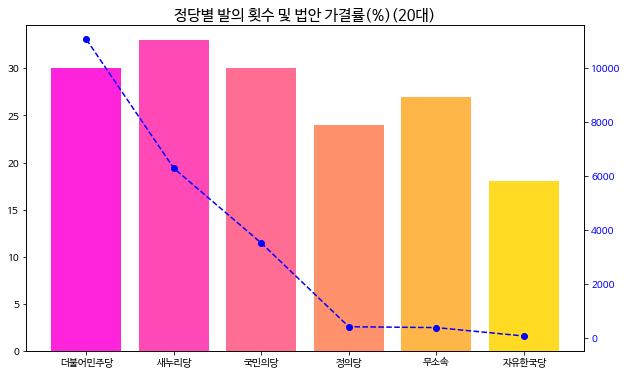

In [118]:
fig = plt.figure(figsize=(10,6))
fig.set_facecolor('white')
ax1 = fig.add_subplot() # axes 생성

colors = sns.color_palette('spring',len(df_20)) ## 바 차트 색상

xtick_label_position = list(range(len(df_20))) # x축 눈금 표시 좌표



ax1.set_xticks(xtick_label_position) # x축 눈금 표시
# ax1.set_xticklabels(xtick_label_position, df_20['paraty_name']) # x축 눈금 라벨
plt.xticks(xtick_label_position, df_20['party_name']) ## x축 눈금 라벨 출력
ax1.bar(xtick_label_position, df_20['percent'], color=colors) #바차트 출력

color = 'blue'
ax2 = ax1.twinx() #새로운 axis 생성
ax2.plot(xtick_label_position, df_20['count'], color=color, linestyle='--',marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("정당별 발의 횟수 및 법안 가결률(%)(20대)", fontsize=15)
plt.show();


#**국회 출석률(보류)**

- 참고 기사 : http://newslabit.hankyung.com/article/201906163394G , http://newslabit.hankyung.com/article/201907117204G 
- 본회의 vs. 상임위 출석률 격차

#**(추가)발의 법안 주제**

In [124]:
suggest_21['법률안명'].value_counts()[:20]

조세특례제한법 일부개정법률안                      349
공직선거법 일부개정법률안                        195
국회법 일부개정법률안                          168
지방세특례제한법 일부개정법률안                     153
도로교통법 일부개정법률안                        152
감염병의 예방 및 관리에 관한 법률 일부개정법률안          147
근로기준법 일부개정법률안                        144
아동복지법 일부개정법률안                        125
국가재정법 일부개정법률안                        116
의료법 일부개정법률안                           93
지방세법 일부개정법률안                          80
형사소송법 일부개정법률안                         78
아동학대범죄의 처벌 등에 관한 특례법 일부개정법률안          77
남녀고용평등과 일·가정 양립 지원에 관한 법률 일부개정법률안     73
소득세법 일부개정법률안                          69
국민건강보험법 일부개정법률안                       68
지방자치법 일부개정법률안                         68
정부조직법 일부개정법률안                         66
형법 일부개정법률안                            66
동물보호법 일부개정법률안                         64
Name: 법률안명, dtype: int64

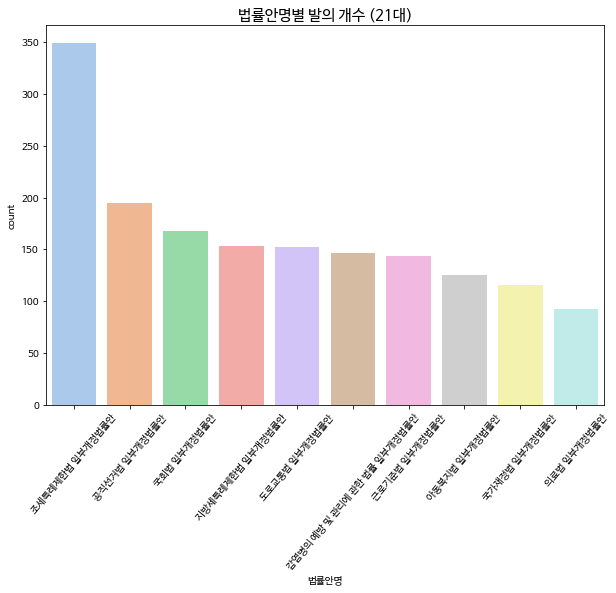

In [152]:
plt.figure(figsize=(10,7))

sns.countplot(data = suggest_21,
              x = '법률안명',
              order = suggest_21['법률안명'].value_counts()[:10].index)
plt.title("법률안명별 발의 개수 (21대)", fontsize=15)
plt.xticks(rotation=50)
plt.show();

In [143]:
suggest_20['BILL_NAME'].value_counts()[:20]

조세특례제한법 일부개정법률안                       608
공직선거법 일부개정법률안                         343
도로교통법 일부개정법률안                         277
국회법 일부개정법률안                           267
근로기준법 일부개정법률안                         217
지방세특례제한법 일부개정법률안                      197
국가재정법 일부개정법률안                         187
의료법 일부개정법률안                           183
형법 일부개정법률안                            158
소득세법 일부개정법률안                          154
정보통신망 이용촉진 및 정보보호 등에 관한 법률 일부개정법률안    154
국민건강보험법 일부개정법률안                       143
남녀고용평등과 일·가정 양립 지원에 관한 법률 일부개정법률안     132
성폭력범죄의 처벌 등에 관한 특례법 일부개정법률안           128
자동차관리법 일부개정법률안                        126
전기사업법 일부개정법률안                         121
국민연금법 일부개정법률안                         119
공공기관의 운영에 관한 법률 일부개정법률안               118
독점규제 및 공정거래에 관한 법률 일부개정법률안            117
형사소송법 일부개정법률안                         116
Name: BILL_NAME, dtype: int64

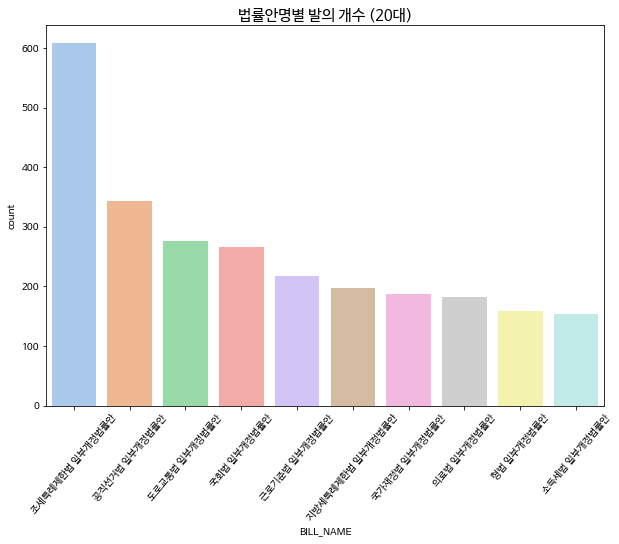

In [151]:
plt.figure(figsize=(10,7))

sns.countplot(data = suggest_20,
              x = 'BILL_NAME',
              order = suggest_20['BILL_NAME'].value_counts()[:10].index)
plt.title("법률안명별 발의 개수 (20대)", fontsize=15)
plt.xticks(rotation=50)
plt.show();

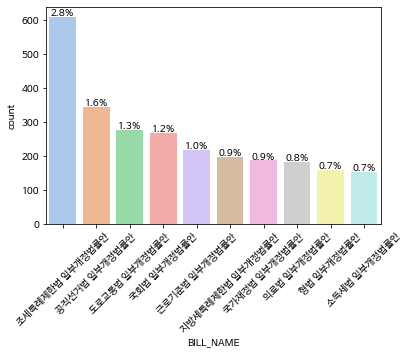

In [172]:
# 법률안명별 발의 개수 (20대) + 그래프 위에 수치 텍스트 첨부
graph=sns.countplot(data = suggest_20,
              x = 'BILL_NAME',
              order = suggest_20['BILL_NAME'].value_counts()[:10].index)

total_amt = suggest_20[suggest_20.PROC_RESULT.notnull()==True].shape[0]

for bar in graph.patches:
  height = bar.get_height() 
  graph.text(bar.get_x()+bar.get_width()/2.,
             height + 4,
             '{:1.1f}%'.format(height/total_amt*100),
             ha="center",fontsize=10)
  
plt.xticks(rotation=45)
plt.show();

###**공공데이터 의안 관련 open api (아직 어떻게 사용하는지 모름)**

In [120]:
import requests

url = 'http://apis.data.go.kr/9710000/BillInfoService2/getBillInfoList'
params ={'serviceKey' : '서비스키', 'pageNo' : '1', 'numOfRows' : '10', 'mem_name_check' : 'G01', 'mem_name' : '김영주', 'hj_nm' : '金榮珠', 'ord' : 'A01', 'start_ord' : '19', 'end_ord' : '19', 'process_num' : '-', 'start_process_num' : '-', 'end_process_num' : '-', 'propose_num' : '-', 'start_propose_num' : '-', 'end_propose_num' : '-', 'start_propose_date' : '2013-01-01', 'end_propose_date' : '2015-01-01', 'start_committee_dt' : '2014-01-01', 'end_committee_dt' : '2015-01-01', 'bill_kind_cd' : 'B04', 'curr_committee' : '9700008', 'proposer_kind_cd' : 'F01', 'p_proc_result_cd' : 'D01', 'b_proc_result_cd' : 'E01', 'bill_name' : '기', 'gbn' : 'dae_num_name', 'amendmentyn' : 'false', 'budget' : 'false' }

response = requests.get(url, params=params)
print(response.content)

b'<OpenAPI_ServiceResponse>\n\t<cmmMsgHeader>\n\t\t<errMsg>SERVICE ERROR</errMsg>\n\t\t<returnAuthMsg>SERVICE_KEY_IS_NOT_REGISTERED_ERROR</returnAuthMsg>\n\t\t<returnReasonCode>30</returnReasonCode>\n\t</cmmMsgHeader>\n</OpenAPI_ServiceResponse>'
